# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Christian Kevin Yohanes]
- **Email:** [christiankeviny007@gmail.com]
- **ID Dicoding:** [x2pqod2q]

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara di Dingling dari tahun 2013 hingga 2017?
- Bagaimana kualitas udara di Guanyuan dari tahun 2013 hingga 2017?
- Bagaimana kualitas udara di Dingling jika dibandingkan dengan Guanyuan dengan tahun yang sama?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
Dingling_df = pd.read_csv("/content/PRSA_Data_Dingling_20130301-20170228.csv", delimiter=",")
Guanyuan_df = pd.read_csv("/content/PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")

Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [3]:
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Menampilkan 5 data terawal pada CSV


### Assessing Data

**Check tipe data Guanyuan**

In [4]:
Guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Check data duplikat**

In [5]:
print("Jumlah duplikasi dingling: ", Dingling_df.duplicated().sum())
print("Jumlah duplikasi guanyuan: ", Guanyuan_df.duplicated().sum())

Jumlah duplikasi dingling:  0
Jumlah duplikasi guanyuan:  0


**Check tipe data Dingling**

In [6]:
Dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Check Dingling NaN 1st times**

In [7]:
Dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


**Check Guanyuan NaN 1st times**

In [8]:
Guanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


**Insight:**
- Mising value pada masing-masing index air quality

### Cleaning Data

**Dingling**

check data NaN dalam tabel

In [9]:
Dingling_df[Dingling_df.O3.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
435,436,2013,3,19,3,40.0,20.0,4.0,28.0,NaN,NaN,-0.5,1003.0,-2.2,0.0,SE,2.1,Dingling
531,532,2013,3,23,3,56.0,71.0,12.0,64.0,NaN,NaN,0.7,1005.5,-4.0,0.0,ESE,3.4,Dingling
627,628,2013,3,27,3,225.0,221.0,29.0,66.0,NaN,NaN,3.2,998.6,-0.8,0.0,NE,0.0,Dingling
723,724,2013,3,31,3,118.0,104.0,14.0,61.0,NaN,NaN,3.9,1013.2,0.4,0.0,ESE,3.1,Dingling
750,751,2013,4,1,6,229.0,235.0,25.0,46.0,NaN,NaN,5.3,1005.3,-0.5,0.0,WNW,2.7,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34884,34885,2017,2,21,12,62.0,62.0,NaN,53.0,NaN,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling


In [10]:
Dingling_df[Dingling_df.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
51,52,2013,3,3,3,57.0,57.0,20.0000,67.0000,NaN,45.0,-4.0,1014.1,-13.4,0.0,NE,0.7,Dingling
147,148,2013,3,7,3,91.0,85.0,32.0000,46.0000,NaN,52.0,1.4,1003.6,-4.3,0.0,SW,1.0,Dingling
178,179,2013,3,8,10,122.0,175.0,31.7016,50.0932,NaN,75.0,17.3,997.3,-3.5,0.0,SE,1.4,Dingling
243,244,2013,3,11,3,75.0,83.0,18.0000,34.0000,NaN,100.0,-1.4,1014.1,-10.8,0.0,N,0.9,Dingling
252,253,2013,3,11,12,113.0,153.0,58.0000,68.0000,NaN,100.0,8.3,1010.4,-9.2,0.0,ESE,0.9,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34866,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,34884,2017,2,21,11,NaN,NaN,26.0000,68.0000,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling
34884,34885,2017,2,21,12,62.0,62.0,NaN,53.0000,NaN,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling


In [11]:
Dingling_df[Dingling_df.NO2.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
10,11,2013,3,1,10,8.0,NaN,3.0,NaN,200.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling


In [12]:
Dingling_df[Dingling_df.SO2.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
50,51,2013,3,3,2,52.0,53.0,NaN,69.0,1300.0,3.0,-3.8,1015.1,-12.7,0.0,NNE,0.8,Dingling
146,147,2013,3,7,2,150.0,149.0,NaN,74.0,1300.0,52.0,3.0,1003.8,-3.8,0.0,SW,0.5,Dingling
752,753,2013,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
753,754,2013,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
754,755,2013,4,1,10,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34884,34885,2017,2,21,12,62.0,62.0,NaN,53.0,NaN,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling


In [13]:
Dingling_df[Dingling_df.PM10.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
10,11,2013,3,1,10,8.0,NaN,3.0,NaN,200.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Dingling
12,13,2013,3,1,12,6.0,NaN,3.0,NaN,200.0,85.0,4.8,1023.8,-19.7,0.0,N,3.0,Dingling
77,78,2013,3,4,5,5.0,NaN,3.0,NaN,200.0,87.0,5.4,1015.4,-12.1,0.0,NW,4.7,Dingling
226,227,2013,3,10,10,7.0,NaN,10.0,7.0,300.0,91.0,10.6,1018.4,-16.8,0.0,S,2.5,Dingling
227,228,2013,3,10,11,12.0,NaN,9.0,6.0,300.0,91.0,10.4,1018.1,-16.9,0.0,SE,2.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,34884,2017,2,21,11,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling


**Dingling Imputation and Dropping**

In [14]:
Dingling_df.drop('wd', axis=1, inplace=True)
Dingling_df.fillna(Dingling_df.max(), inplace=True)

**Check Dingling NaN 2nd times**

In [15]:
Dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Guanyuan**

In [16]:
Guanyuan_df[Guanyuan_df.O3.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
507,508,2013,3,22,3,80.0,152.0,21.0,55.0,NaN,NaN,2.4,1010.1,-5.3,0.0,NE,2.0,Guanyuan
603,604,2013,3,26,3,143.0,181.0,95.0,82.0,NaN,NaN,-0.3,1010.5,-2.8,0.0,SSW,0.1,Guanyuan
699,700,2013,3,30,3,57.0,78.0,48.0,60.0,NaN,NaN,2.9,1016.9,-4.3,0.0,ENE,1.8,Guanyuan
795,796,2013,4,3,3,150.0,186.0,33.0,121.0,NaN,NaN,6.5,1004.2,0.6,0.0,WSW,1.3,Guanyuan
873,874,2013,4,6,9,7.0,17.0,10.0,NaN,NaN,NaN,9.8,1014.3,-7.0,0.0,NW,1.5,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,35044,2017,2,28,3,NaN,NaN,NaN,NaN,NaN,NaN,7.3,1015.8,-9.6,0.0,NE,1.0,Guanyuan
35044,35045,2017,2,28,4,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1016.0,-9.4,0.0,ENE,1.9,Guanyuan
35045,35046,2017,2,28,5,NaN,NaN,NaN,NaN,NaN,NaN,5.3,1015.9,-9.0,0.0,E,1.4,Guanyuan
35046,35047,2017,2,28,6,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1015.9,-11.2,0.0,NNW,3.1,Guanyuan


**Guanyuan Imputation and Dropping**

In [17]:
Guanyuan_df.drop('wd', axis=1, inplace=True)
Guanyuan_df.fillna(Guanyuan_df.max(), inplace=True)

**Check Guanyuan NaN 2nd times**

In [18]:
Guanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Guanyuan dan Dingling memiliki banyak NaN dalam bentuk str dan float
- untuk float menggunakan fillna dengan max value mereka dan str dengan dropna

## Exploratory Data Analysis (EDA)

Merubah index PM2.5 sampai O3 menjadi pivot IQA tahunan dari Dingling dan Guanyuan



**Dingling AQI pivot mean yearly**

In [19]:
#range satuan subindex AQI dari paling baik ke paling buruk
pollutant_breakpoints = {
    'PM2.5': [(0, 35), (35, 75), (75, 115), (115, 150), (150, 250), (250, 350), (350, 500)],
    'PM10': [(0, 50), (50, 150), (150, 250), (250, 350), (350, 420), (420, 500), (500, 600)],
    'SO2': [(0, 50), (50, 150), (150, 475), (475, 800), (800, 1600), (1600, 2100), (2100, 2620)],
    'NO2': [(0, 40), (40, 80), (80, 180), (180, 280), (280, 565), (565, 750), (750, 940)],
    'CO': [(0, 2), (2, 4), (4, 14), (14, 24), (24, 36), (36, 48), (48, 60)],
    'O3': [(0, 100), (100, 160), (160, 215), (215, 265), (265, 800)]
}

#range satuan index AQI dari paling baik ke paling buruk
aqi_breakpoints = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# function penentu kategori berdasarkan range
def classify_aqi_category(aqi):
    if aqi <= 50:
        return 'Excellent'
    elif 51 <= aqi <= 100:
        return 'Good'
    elif 101 <= aqi <= 150:
        return 'Lightly Polluted'
    elif 151 <= aqi <= 200:
        return 'Moderately Polluted'
    elif 201 <= aqi <= 300:
        return 'Heavily Polluted'
    elif 301 <= aqi <= 400:
        return 'Severely Polluted'
    elif 401 <= aqi <= 500:
        return 'Extremely Polluted'
    else:
        return 'Invalid AQI'

# Function rumus AQI
def calculate_subindex(concentration, breakpoints):
    for i, (c_low, c_high) in enumerate(breakpoints):
        if c_low <= concentration <= c_high:
            aqi_low, aqi_high = aqi_breakpoints[i]
            return aqi_low + (aqi_high - aqi_low) * (concentration - c_low) / (c_high - c_low)
    return None

# Function variable untuk function berdasarkan rownya
def calculate_aqi_for_row(row):
    pollutant_concentrations = {
        'PM2.5': row['PM2.5'],
        'PM10': row['PM10'],
        'SO2': row['SO2'],
        'NO2': row['NO2'],
        'CO': row['CO'],
        'O3': row['O3']
    }

    sub_indexes = {}
    for pollutant, concentration in pollutant_concentrations.items():
        if pollutant in pollutant_breakpoints and pd.notnull(concentration):
            subindex = calculate_subindex(concentration, pollutant_breakpoints[pollutant])
            if subindex is not None:
                sub_indexes[pollutant] = subindex

    # Return nilai max sub-index sebagai nilai AQI
    if sub_indexes:
        return max(sub_indexes.values())
    return None

# Gabungin tahun, bulan, hari, jam menjadi satu array variable datetime
Dingling_df['datetime'] = pd.to_datetime(Dingling_df[['year', 'month', 'day', 'hour']])

# Apply perhitungan AQI untuk setiap row di DataFrame (df)
Dingling_df['AQI'] = Dingling_df.apply(calculate_aqi_for_row, axis=1)

# Extract tahun dari datetime
Dingling_df['year'] = Dingling_df['datetime'].dt.year

# Menghitung rata-rata AQI tiap tahun
dl_yearly_aqi = Dingling_df.groupby('year')['AQI'].mean().reset_index()

# Membulatkan dan mengubah float menjadi integer
dl_yearly_aqi['AQI'] = dl_yearly_aqi['AQI'].round(0).astype(int)

# Apply kategori AQI ke rata-rata AQI tahunan
dl_yearly_aqi['AQI_Category'] = dl_yearly_aqi['AQI'].apply(classify_aqi_category)

# Mengeluarkan pivot tabel rata-rata AQI dan kategori AQI pertahun
dl_yearly_aqi


,year,AQI,AQI_Category
0,2013,109,Lightly Polluted
1,2014,118,Lightly Polluted
2,2015,103,Lightly Polluted
3,2016,102,Lightly Polluted
4,2017,102,Lightly Polluted


**Berdasarkan bulan**

In [22]:
#dataframe diganti berdasarkan bulan
Dingling_df['month'] = Dingling_df['datetime'].dt.month

# Menghitung rata-rata AQI tiap bulan
dl_monthly_aqi = Dingling_df.groupby('month')['AQI'].mean().reset_index()

# Membulatkan dan mengubah float menjadi integer
dl_monthly_aqi['AQI'] = dl_monthly_aqi['AQI'].round(0).astype(int)

# Apply kategori AQI ke rata-rata AQI bulanan
dl_monthly_aqi['AQI_Category'] = dl_monthly_aqi['AQI'].apply(classify_aqi_category)

# Mengeluarkan pivot tabel rata-rata AQI dan kategori AQI perbulan
dl_monthly_aqi

,month,AQI,AQI_Category
0,1,111,Lightly Polluted
1,2,119,Lightly Polluted
2,3,130,Lightly Polluted
3,4,110,Lightly Polluted
4,5,102,Lightly Polluted
5,6,101,Lightly Polluted
6,7,119,Lightly Polluted
7,8,84,Good
8,9,85,Good
9,10,112,Lightly Polluted


**Guanyuan AQI pivot yearly**

In [20]:
# range satuan subindex AQI dari paling baik ke paling buruk
pollutant_breakpoints = {
    'PM2.5': [(0, 35), (35, 75), (75, 115), (115, 150), (150, 250), (250, 350), (350, 500)],
    'PM10': [(0, 50), (50, 150), (150, 250), (250, 350), (350, 420), (420, 500), (500, 600)],
    'SO2': [(0, 50), (50, 150), (150, 475), (475, 800), (800, 1600), (1600, 2100), (2100, 2620)],
    'NO2': [(0, 40), (40, 80), (80, 180), (180, 280), (280, 565), (565, 750), (750, 940)],
    'CO': [(0, 2), (2, 4), (4, 14), (14, 24), (24, 36), (36, 48), (48, 60)],
    'O3': [(0, 100), (100, 160), (160, 215), (215, 265), (265, 800)]
}

# range satuan index AQI dari paling baik ke paling buruk
aqi_breakpoints = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# function penentu kategori berdasarkan range
def classify_aqi_category(aqi):
    if aqi <= 50:
        return 'Excellent'
    elif 51 <= aqi <= 100:
        return 'Good'
    elif 101 <= aqi <= 150:
        return 'Lightly Polluted'
    elif 151 <= aqi <= 200:
        return 'Moderately Polluted'
    elif 201 <= aqi <= 300:
        return 'Heavily Polluted'
    elif 301 <= aqi <= 400:
        return 'Severely Polluted'
    elif 401 <= aqi <= 500:
        return 'Extremely Polluted'
    else:
        return 'Invalid AQI'

# Function rumus AQI
def calculate_subindex(concentration, breakpoints):
    for i, (c_low, c_high) in enumerate(breakpoints):
        if c_low <= concentration <= c_high:
            aqi_low, aqi_high = aqi_breakpoints[i]
            return aqi_low + (aqi_high - aqi_low) * (concentration - c_low) / (c_high - c_low)
    return None

# Function variable untuk function berdasarkan rownya
def calculate_aqi_for_row(row):
    pollutant_concentrations = {
        'PM2.5': row['PM2.5'],
        'PM10': row['PM10'],
        'SO2': row['SO2'],
        'NO2': row['NO2'],
        'CO': row['CO'],
        'O3': row['O3']
    }

    sub_indexes = {}
    for pollutant, concentration in pollutant_concentrations.items():
        if pollutant in pollutant_breakpoints and pd.notnull(concentration):
            subindex = calculate_subindex(concentration, pollutant_breakpoints[pollutant])
            if subindex is not None:
                sub_indexes[pollutant] = subindex

   # Return nilai max sub-index sebagai nilai AQI
    if sub_indexes:
        return max(sub_indexes.values())
    return None

# Gabungin tahun, bulan, hari, jam menjadi satu array variable datetime
Guanyuan_df['datetime'] = pd.to_datetime(Guanyuan_df[['year', 'month', 'day', 'hour']])

# Apply perhitungan AQI untuk setiap row di DataFrame (df)
Guanyuan_df['AQI'] = Guanyuan_df.apply(calculate_aqi_for_row, axis=1)

# Extract tahun dari datetime
Guanyuan_df['year'] = Guanyuan_df['datetime'].dt.year

# Menghitung rata-rata AQI tiap tahun
gy_yearly_aqi = Guanyuan_df.groupby('year')['AQI'].mean().reset_index()

# Membulatkan dan mengubah float menjadi integer
gy_yearly_aqi['AQI'] = gy_yearly_aqi['AQI'].round(0).astype(int)

# Apply kategori AQI ke rata-rata AQI tahunan
gy_yearly_aqi['AQI_Category'] = gy_yearly_aqi['AQI'].apply(classify_aqi_category)

# Mengeluarkan pivot tabel rata-rata AQI dan kategori AQI pertahun
gy_yearly_aqi


,year,AQI,AQI_Category
0,2013,134,Lightly Polluted
1,2014,134,Lightly Polluted
2,2015,122,Lightly Polluted
3,2016,117,Lightly Polluted
4,2017,133,Lightly Polluted


**Berdasarkan bulan**

In [21]:
#dataframe diganti berdasarkan bulan
Guanyuan_df['month'] = Guanyuan_df['datetime'].dt.month

# Menghitung rata-rata AQI tiap bulan
gy_monthly_aqi = Guanyuan_df.groupby('month')['AQI'].mean().reset_index()

# Membulatkan dan mengubah float menjadi integer
gy_monthly_aqi['AQI'] = gy_monthly_aqi['AQI'].round(0).astype(int)

# Apply kategori AQI ke rata-rata AQI bulanan
gy_monthly_aqi['AQI_Category'] = gy_monthly_aqi['AQI'].apply(classify_aqi_category)

# Mengeluarkan pivot tabel rata-rata AQI dan kategori AQI perbulan
gy_monthly_aqi

,month,AQI,AQI_Category
0,1,131,Lightly Polluted
1,2,129,Lightly Polluted
2,3,138,Lightly Polluted
3,4,121,Lightly Polluted
4,5,115,Lightly Polluted
5,6,119,Lightly Polluted
6,7,121,Lightly Polluted
7,8,101,Lightly Polluted
8,9,105,Lightly Polluted
9,10,140,Lightly Polluted


**Insight:**
- Data Dingling mengalami **peningkatan kualitas udara dari tahun 2013 ke 2017**
- Guanyuan berada di kategori **light polluted** lalu **meningkat kualitas udaranya dari tahun  2013 ke 2016** setelah itu **memburuk kembali** pada tahun **2017**

## Visualization & Explanatory Analysis

**Dingling dan Guanyuan tahunan**

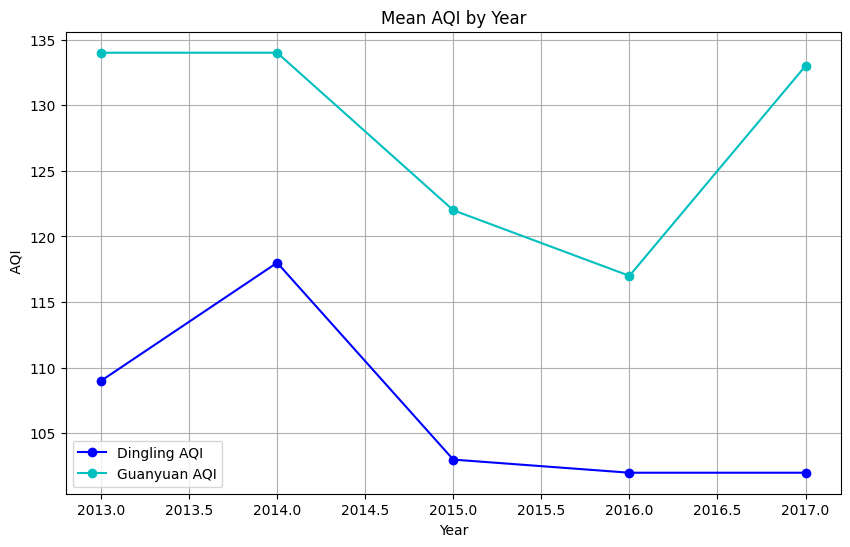

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(dl_yearly_aqi['year'], dl_yearly_aqi['AQI'], marker='o', linestyle='-', color='b', label='Dingling AQI')
plt.plot(gy_yearly_aqi['year'], gy_yearly_aqi['AQI'], marker='o', linestyle='-', color='c', label='Guanyuan AQI')

# label and judul
plt.xlabel('Year')
plt.ylabel(' AQI')
plt.title('Mean AQI by Year')
plt.grid(True)


# legend
plt.legend()

# plotting
plt.show()

**Dingling dan Guanyuan Bulanan**

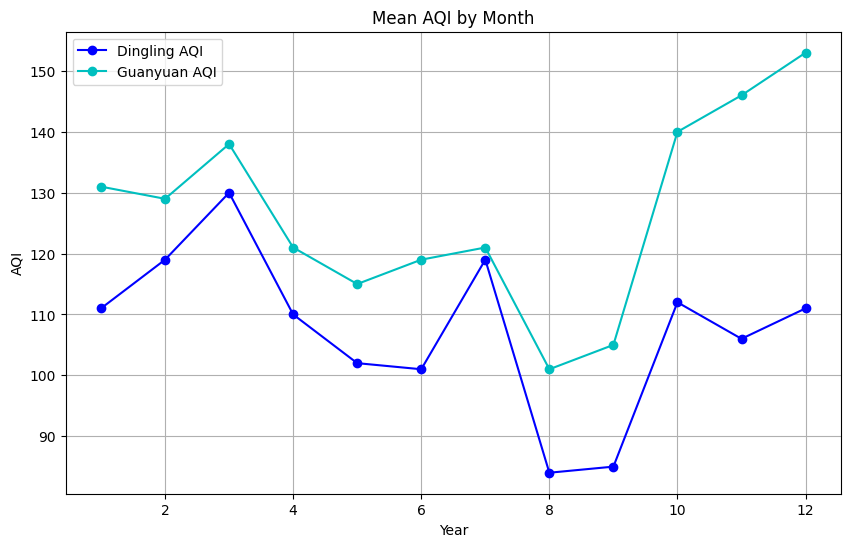

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dl_monthly_aqi['month'], dl_monthly_aqi['AQI'], marker='o', linestyle='-', color='b', label='Dingling AQI')
plt.plot(gy_monthly_aqi['month'], gy_monthly_aqi['AQI'], marker='o', linestyle='-', color='c', label='Guanyuan AQI')

# label and judul
plt.xlabel('Year')
plt.ylabel('AQI')
plt.title('Mean AQI by Month')
plt.grid(True)

# legend
plt.legend()

# plotting
plt.show()

**Insight**

- terlihat bahwa kesimpulan yang sebelumnya sangat sesuai dengan grafik garis dimana semakin besar nilainya, maka semakin berpolusi tempat tersebut

In [24]:
all_data_chinadf = pd.concat([Dingling_df, Guanyuan_df], axis=0, ignore_index=True)

# Check the merged DataFrame
all_data_chinadf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station,datetime,AQI
0,1,2013,3,1,0,4.0,4.0,3.0,205.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,0.5,Dingling,2013-03-01 00:00:00,163.25
1,2,2013,3,1,1,7.0,7.0,3.0,205.0,200.0,80.0,-2.5,1021.3,-19.0,0.0,0.7,Dingling,2013-03-01 01:00:00,163.25
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,0.2,Dingling,2013-03-01 02:00:00,39.50
3,4,2013,3,1,3,6.0,6.0,3.0,205.0,200.0,79.0,-3.6,1021.8,-19.1,0.0,1.0,Dingling,2013-03-01 03:00:00,163.25
4,5,2013,3,1,4,5.0,5.0,3.0,205.0,200.0,81.0,-3.5,1022.3,-19.4,0.0,2.1,Dingling,2013-03-01 04:00:00,163.25


**Download cleared CSV**

In [25]:
dl_monthly_aqi.to_csv("dl_monthly_aqi.csv", index=False)
dl_yearly_aqi.to_csv("dl_yearly_aqi.csv", index=False)
gy_monthly_aqi.to_csv("gy_monthly_aqi.csv", index=False)
gy_yearly_aqi.to_csv("gy_yearly_aqi.csv", index=False)
all_data_chinadf.to_csv("all_data_chinadf.csv",index=False)



## Analisis Lanjutan (Opsional)

## Conclusion

- Terlihat pada data Dingling tidak terlalu berubah dari kategori light polluted hanya saja mengalami **peningkatan kualitas udara dari tahun 2013 ke 2017**
- tidak jauh berbeda dengan Guanyuan yang berada di kategori light polluted dan terjadi **peningkatan kualitas udara dari tahun  2013 ke 2016** namun **memburuk kembali** pada tahun **2017**
- berdasarkan angka terlihat **Dingling** memiliki **index kualitas udara** yang **lebih baik** jika dibandingkan dengan **Guanyuan**
- Analisis ini dapat dilanjutkan lagi dengan membandingkan banyak data dari tiap tempat dan menjadikannya bentuk map dengan **GeoPandas dengan warna** yang merepresentasikan **nilai AQI beserta kategorinya**